In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

In [7]:
df = pd.read_csv('./Data/bmi_500.csv')

In [11]:
x = df['Height']
x = sm.add_constant(x)
y = df['Weight']

model = sm.OLS(y,x)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Thu, 14 Aug 2025   Prob (F-statistic):              0.992
Time:                        11:05:55   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4900.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8501     15.129      6.996      0.000      76.125     135.575
Height         0.0009      0.089      0.010      0.992      -0.173       0.175
==============================================================================
Omnibus:                      310.450   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.981
Skew:                          -0.038   Prob(JB):                     3.09e-07
Kurtosis:                       1.803   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
result.params['Height']

np.float64(0.0008818709103604605)

In [15]:
estimation = [result.params['Height'] * i for i in df['Height']]

In [22]:
estimation = [] 
for i in df['Height']:
    estimation.append((result.params['Height'] * i ) + result.params['const'])
df['estimation'] = estimation

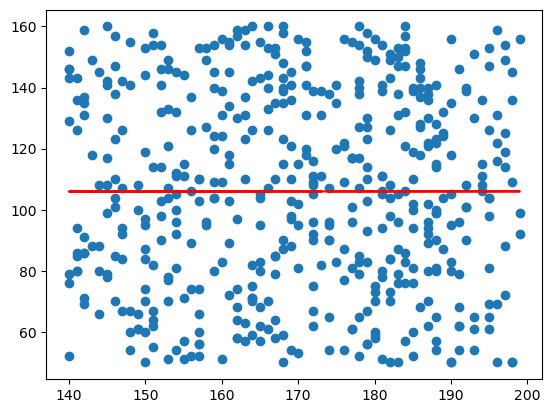

In [25]:
plt.scatter(df['Height'], df['Weight'])
plt.plot(df['Height'] , estimation , color = 'red')

In [27]:
gender_coder = {
    'Female' : 0,
    'Male' : 1
}

df['Gender'] = df['Gender'].apply(lambda x : gender_coder[x])
df

,Gender,Height,Weight,Label,estimation
0,1,174,96,Obesity,106.003577
1,1,189,87,Normal,106.016805
2,0,185,110,Obesity,106.013277
3,0,195,104,Overweight,106.022096
4,1,149,61,Overweight,105.981530
...,...,...,...,...,...
495,0,150,153,Extreme Obesity,105.982412
496,0,184,121,Obesity,106.012396
497,0,141,136,Extreme Obesity,105.974475
498,1,150,95,Extreme Obesity,105.982412


In [28]:
df['interaction'] = df['Gender'] * df['Height'] 

In [30]:
x = df[['Height','Gender','interaction']]
x = sm.add_constant(x)
y = df['Weight']

model = sm.OLS(y,x)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1347
Date:                Thu, 14 Aug 2025   Prob (F-statistic):              0.939
Time:                        11:37:21   Log-Likelihood:                -2447.6
No. Observations:                 500   AIC:                             4903.
Df Residuals:                     496   BIC:                             4920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          95.8527     22.165      4.325      0.000      52.304     139.401
Height          0.0578      0.130      0.446      0.656      -0.197       0.313
Gender         18.7313     30.373      0.617      0.538     -40.944      78.407
interaction    -0.1066      0.178     -0.599      0.549      -0.456       0.243
==============================================================================
Omnibus:                      309.611   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.937
Skew:                          -0.033   Prob(JB):                     3.16e-07
Kurtosis:                       1.803   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [42]:
#One=Hot 인코딩
one_hot = pd.get_dummies(df['Label']).astype(int)
df = pd.concat([df,one_hot], axis = 1)

In [44]:
for i in one_hot.columns:
    df['interaction_{}'.format(i)] = df['Height'] * df[i]

In [45]:
df

,Gender,Height,Weight,Label,estimation,interaction,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak,interaction_Extreme Obesity,interaction_Extremely Weak,interaction_Normal,interaction_Obesity,interaction_Overweight,interaction_Weak
0,1,174,96,Obesity,106.003577,174,0,0,0,1,0,0,0,0,0,174,0,0
1,1,189,87,Normal,106.016805,189,0,0,1,0,0,0,0,0,189,0,0,0
2,0,185,110,Obesity,106.013277,0,0,0,0,1,0,0,0,0,0,185,0,0
3,0,195,104,Overweight,106.022096,0,0,0,0,0,1,0,0,0,0,0,195,0
4,1,149,61,Overweight,105.981530,149,0,0,0,0,1,0,0,0,0,0,149,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,150,153,Extreme Obesity,105.982412,0,1,0,0,0,0,0,150,0,0,0,0,0
496,0,184,121,Obesity,106.012396,0,0,0,0,1,0,0,0,0,0,184,0,0
497,0,141,136,Extreme Obesity,105.974475,0,1,0,0,0,0,0,141,0,0,0,0,0
498,1,150,95,Extreme Obesity,105.982412,150,1,0,0,0,0,0,150,0,0,0,0,0


In [47]:
clm = ['Height'] + list(df.columns[-12:])

In [50]:
x = df[clm]
x = sm.add_constant(x)
y = df['Weight']

model = sm.OLS(y,x)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     231.4
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          1.18e-185
Time:                        12:09:04   Log-Likelihood:                -1991.0
No. Observations:                 500   AIC:                             4006.
Df Residuals:                     488   BIC:                             4056.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -26.8854     14.766     -1.821      0.069     -55.899       2.128
Height                          0.5746      0.080      7.209      0.000       0.418       0.731
Extreme Obesity                39.9695     17.264      2.315      0.021       6.049      73.890
Extremely Weak                104.6959     66.068      1.585      0.114     -25.117     234.509
Normal                        -26.2896     22.567     -1.165      0.245     -70.630      18.051
Obesity                       -78.2209     18.371     -4.258      0.000    -114.316     -42.125
Overweight                    -51.2726     21.375     -2.399      0.017     -93.271      -9.275
Weak                          -15.7677     54.525     -0.289      0.773    -122.900      91.364
interaction_Extreme Obesity     0.1696      0.097      1.748      0.081      -0.021       0.360
interaction_Extremely Weak     -0.7139      0.352     -2.027      0.043      -1.406      -0.022
interaction_Normal              0.1270      0.126      1.008      0.314      -0.121       0.375
interaction_Obesity             0.6508      0.101      6.421      0.000       0.452       0.850
interaction_Overweight          0.3632      0.118      3.069      0.002       0.131       0.596
interaction_Weak               -0.0222      0.295     -0.075      0.940      -0.601       0.557
==============================================================================
Omnibus:                        7.009   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.404
Skew:                          -0.010   Prob(JB):                      0.00551
Kurtosis:                       3.706   Cond. No.                     3.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""